<a href="https://colab.research.google.com/github/AlanMarquesRocha/pv_cells_detection_fault/blob/main/pv_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from PIL import Image
import numpy as np
import os
from skimage.color import rgb2gray

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from tqdm import tqdm
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold


tf.__version__

'2.12.0'

In [6]:
import seaborn
import random
from skimage import io
import glob

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
# Realiza a cópia de uma pasta específica do drive no ambiente colab:
# O comando abaixo realiza uma cópia das imagens que serão utilizadas no projeto.

# cópia as imagens do dataset para uma pasta específica do drive
!cp -R /content/gdrive/MyDrive/_ppgeec_mestrado/2022_2/code_implementation/ pv_classifier/


In [12]:
def load_dataset(fname=None):
    if fname is None:
        # Assume we are in the utils folder and get the absolute path to the
        # parent directory.
        fname = os.path.abspath(os.path.join(os.path.dirname("/content/pv_classifier"),
                                             os.path.pardir))
        fname = os.path.join(fname, '/content/pv_classifier/labels.csv')

    data = np.genfromtxt(fname, dtype=['|S19', '<f8', '|S4'], names=[
                         'path', 'probability', 'type'])
    image_fnames = np.char.decode(data['path'])
    probs = data['probability']
    types = np.char.decode(data['type'])

    def load_cell_image(fname):
        with Image.open(fname) as image:
            return np.asarray(image)

    dir = os.path.dirname(fname)
    
    images = np.array([load_cell_image(os.path.join(dir, fn))
                       for fn in image_fnames])

    return images, probs, types

In [13]:
images, proba, types = load_dataset()



In [18]:
# Informando o que é atributo e o que é classe
X = images
y = proba


In [ ]:
images, _, _ = load_dataset()

# converter a lista numpy em uma lista Python
images_list = images.tolist()

# verificar o tipo da variável images_list
print(type(images_list))  # <class 'list'>

<class 'list'>


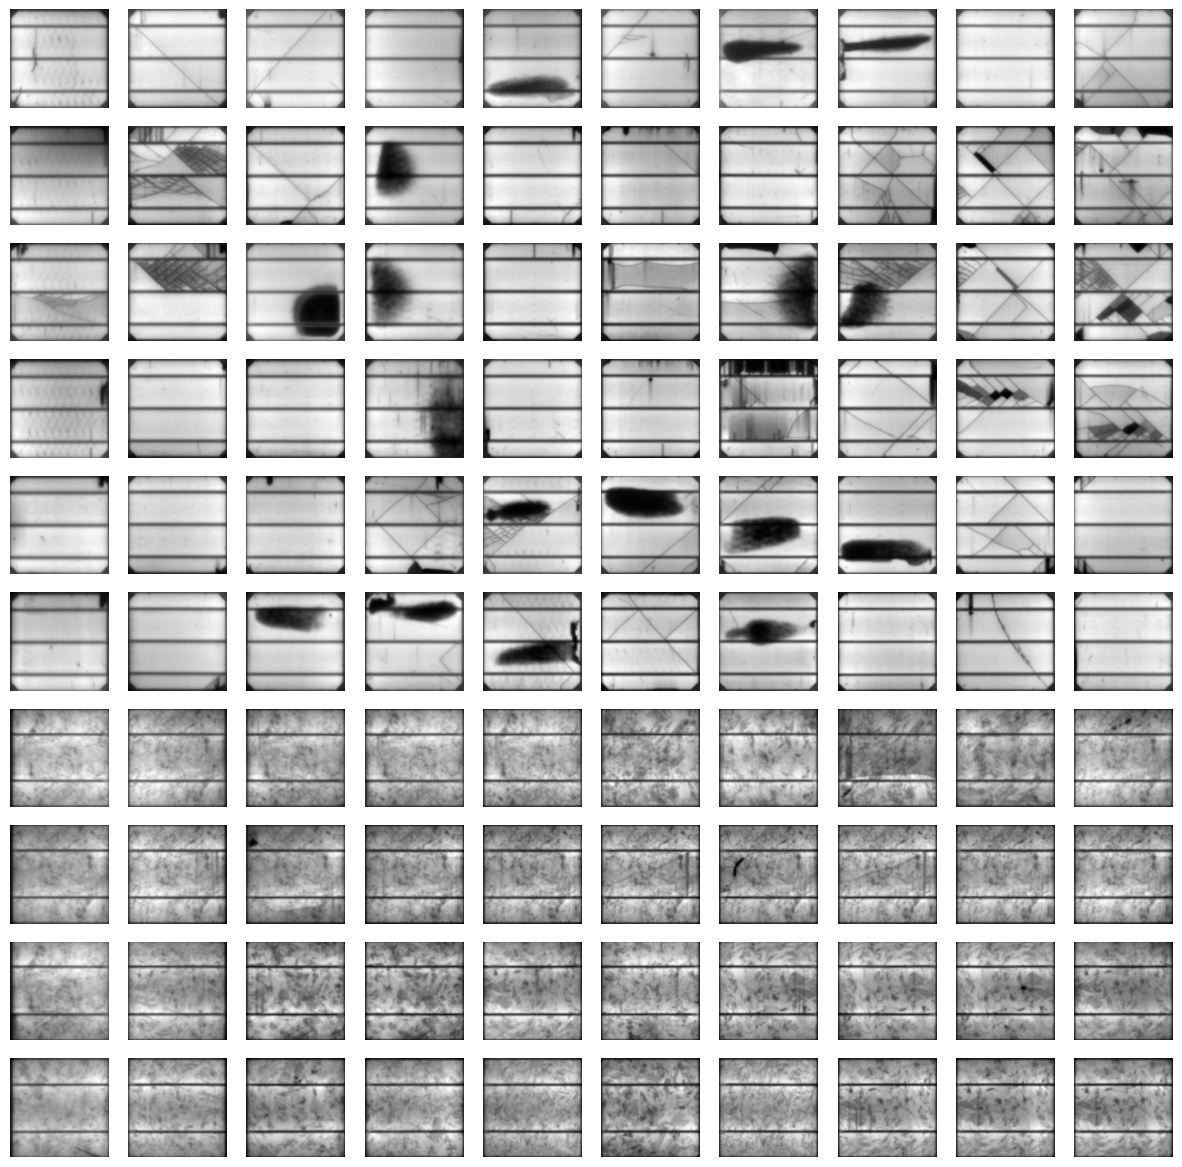

In [ ]:
L_grid = 10 # Especifica o número de linhas
W_grid = 10 # Especifica o número de colunas

k = 0.2
fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel()
n_images = len(images_list)

for i in np.arange(0, W_grid * L_grid):
  #index = np.random.randint(0, n_images)
  axes[i].imshow(images_list[i], cmap = 'gray')
  # axes[i].set_title(labels, fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.1)